In [83]:
import pandas as pd
import hashlib as hl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

df = pd.read_csv("../athlete_events.csv")

hashes = df["Name"].apply(lambda client_num: hl.sha256(client_num.encode()).hexdigest())
df.insert(1, "SHA Hash Values", hashes)
drop = df.drop(columns= ["Name"])
df = drop


# Tyskland


In [67]:
""" Försöker hitta en kod som sållar bort alla medaljer för teamsporter """


# ger_df = df[df["NOC"] == "GER"]
# medal = ger_df["Medal"].isin(["Gold", "Silver", "Bronze"])
# medals = ger_df[medal]
# fotball = medals["Sport"].isin(["Football"])
# only_fotball = medals[fotball]
# only_fotball.sort_values(by="Year", ascending=False).head(3)

' Försöker hitta en kod som sållar bort alla medaljer för teamsporter '

In [68]:
ger_df = df[df["NOC"] == "GER"]
medal = ger_df["Medal"].isin(["Gold", "Silver", "Bronze"])
medals = ger_df[medal]
color1 = ["silver", "orange", "gold"]

fig = px.bar(medals, x="Medal", color="Medal", color_discrete_sequence=color1, width=500, height=500)
fig.update_layout(title="Tyska Induviduella Medaljer", xaxis_title="Valör", yaxis_title="Antal")
fig.show()

In [69]:

temp_df = ger_df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])
ny_team_variabel = temp_df["Medal"].isin(["Gold", "Silver", "Bronze"])
ny_team_variabel = temp_df[ny_team_variabel]

fig = px.bar(ny_team_variabel, x="Medal", color="Medal", color_discrete_sequence=color1, width=500, height=500)
fig.update_layout(title="Tyska Nationella Medaljer", xaxis_title="Valör", yaxis_title="Antal")
fig.show()

In [ ]:
ny_team_variabel["Medaltot"] = 1

df_grouped = ny_team_variabel.groupby(['Year', 'Medal']).sum().reset_index()

# Omstrukturera data för att skapa en kolumn per medaljtyp
df_pivot = df_grouped.pivot(index='Year', columns='Medal', values='Medaltot')
df_pivot_g = df_pivot["Gold"]
df_pivot_s = df_pivot["Silver"]
df_pivot_b = df_pivot["Bronze"]
# ger_df = df[df["NOC"] == "GER"]

# Skapa linjediagram
fig = px.line(df_pivot_g, title="Medaljer per År",  color_discrete_sequence=color1, labels={'value': 'Antal Medaljer'})
fig.show()

# fig = px.line(ny_team_variabel, x="Year", y="Medaltot", color="Medal", color_discrete_sequence=color1, width=500, height=500)
# fig.update_layout(title="Tyska Nationella Medaljer", xaxis_title="År", yaxis_title="Antal")
# fig.show()

C:\Users\emil_\AppData\Local\Temp\ipykernel_18824\1027462370.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df_pivot

Medal,Bronze,Gold,Silver
Year,,,
1896,2,7,5
1900,2,4,3
1904,7,4,5
1906,4,4,6
1908,5,3,5
1912,7,6,13
1928,20,11,9
1932,9,5,12
1936,32,41,34


In [71]:
citys = df["City"].isin(["Berlin", "Munchen", "GarmischPartenkirchen"])
citys = df[citys].drop_duplicates(subset=["Games"])
citys

,ID,SHA Hash Values,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
94,31,ffed3dedc8be6d33aeca22b2a1de002f818898a9ef2883...,M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN


<BarContainer object of 5 artists>

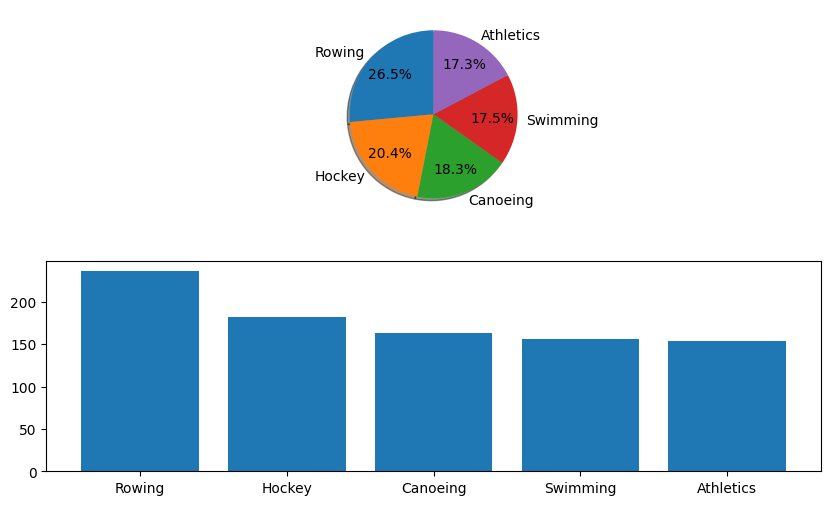

In [72]:
sport_top_5 = medals["Sport"].value_counts().head(5)
sport_top_5


fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].pie(sport_top_5, labels=sport_top_5.index, autopct="%1.1f%%", pctdistance=0.7, startangle=90, shadow=True)

ax[1].bar(sport_top_5.index, sport_top_5.values)

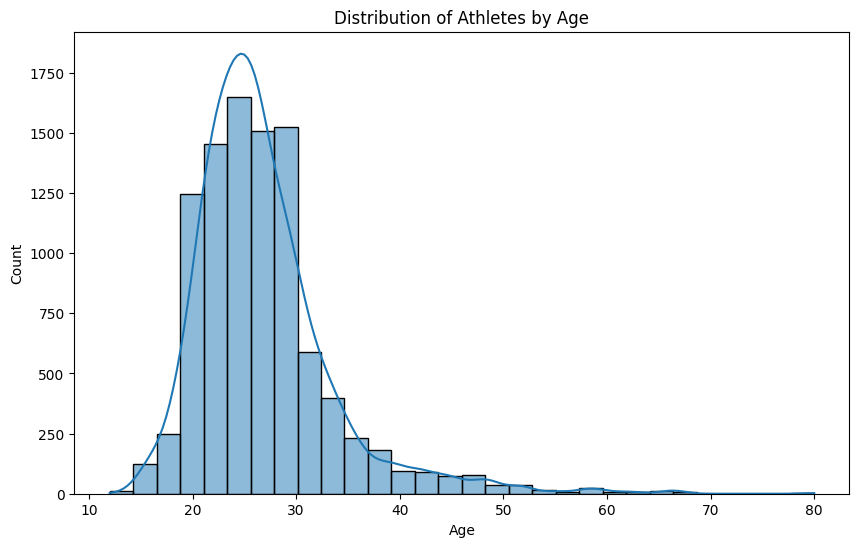

In [73]:
# Distribution of athletes by age
plt.figure(figsize=(10, 6))
sns.histplot(data=ger_df, x="Age", bins=30, kde=True)
plt.title('Distribution of Athletes by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

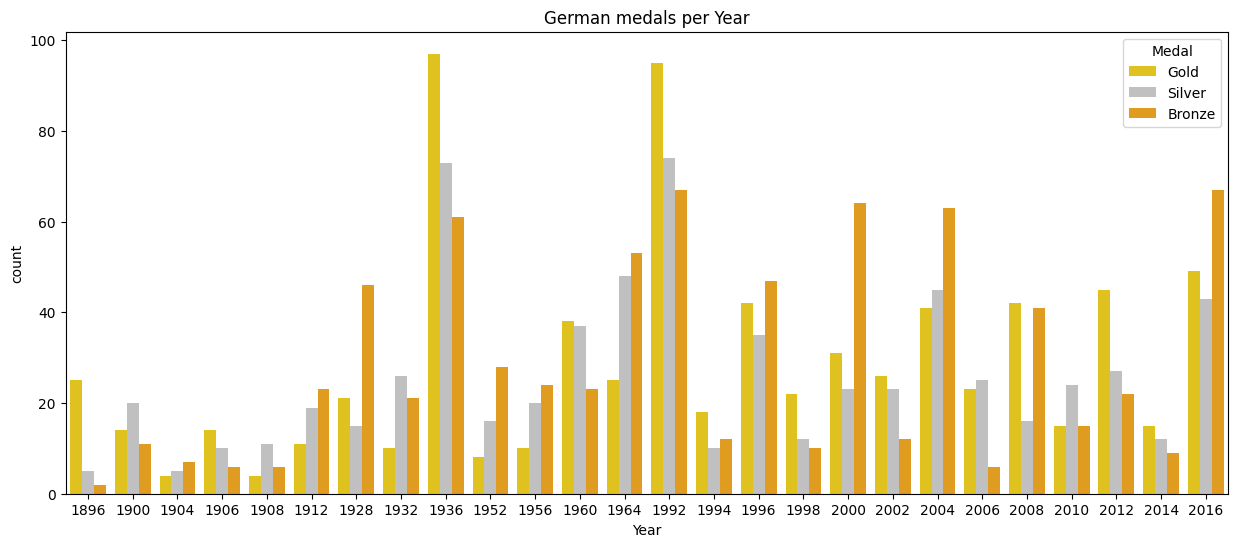

In [74]:
colcor = ["gold", "silver", "orange"]
plt.figure(figsize=(15, 6))
sns.countplot(data=medals, x="Year", hue="Medal", palette=colcor)
plt.title("German medals per Year")
plt.show()

In [75]:
""" Tabell på medaljer per land """


ger_df1 = pd.concat([ger_df,pd.get_dummies(df["Medal"])],axis = 1)

medals = ger_df1.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold",ascending=False).reset_index()
medals.head()

,NOC,Gold,Silver,Bronze
0,GER,745,674,746


# The Whole World

In [76]:
""" Tabell på medaljer per land top 10 """

df_cleaned_nan = df.dropna(subset=["Medal"])

df_cleaned_nan = pd.concat([df_cleaned_nan, pd.get_dummies(df_cleaned_nan["Medal"], prefix='Medal')], axis=1)

medals = df_cleaned_nan.groupby("NOC").sum()[["Medal_Gold", "Medal_Silver", "Medal_Bronze"]].sort_values("Medal_Gold", ascending=False).reset_index()

medals.head(10)


,NOC,Medal_Gold,Medal_Silver,Medal_Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,678,739,651
4,ITA,575,531,531
5,FRA,501,610,666
6,SWE,479,522,535
7,CAN,463,438,451
8,HUN,432,332,371
9,GDR,397,327,281


Text(0.5, 1.0, 'Gold medals')

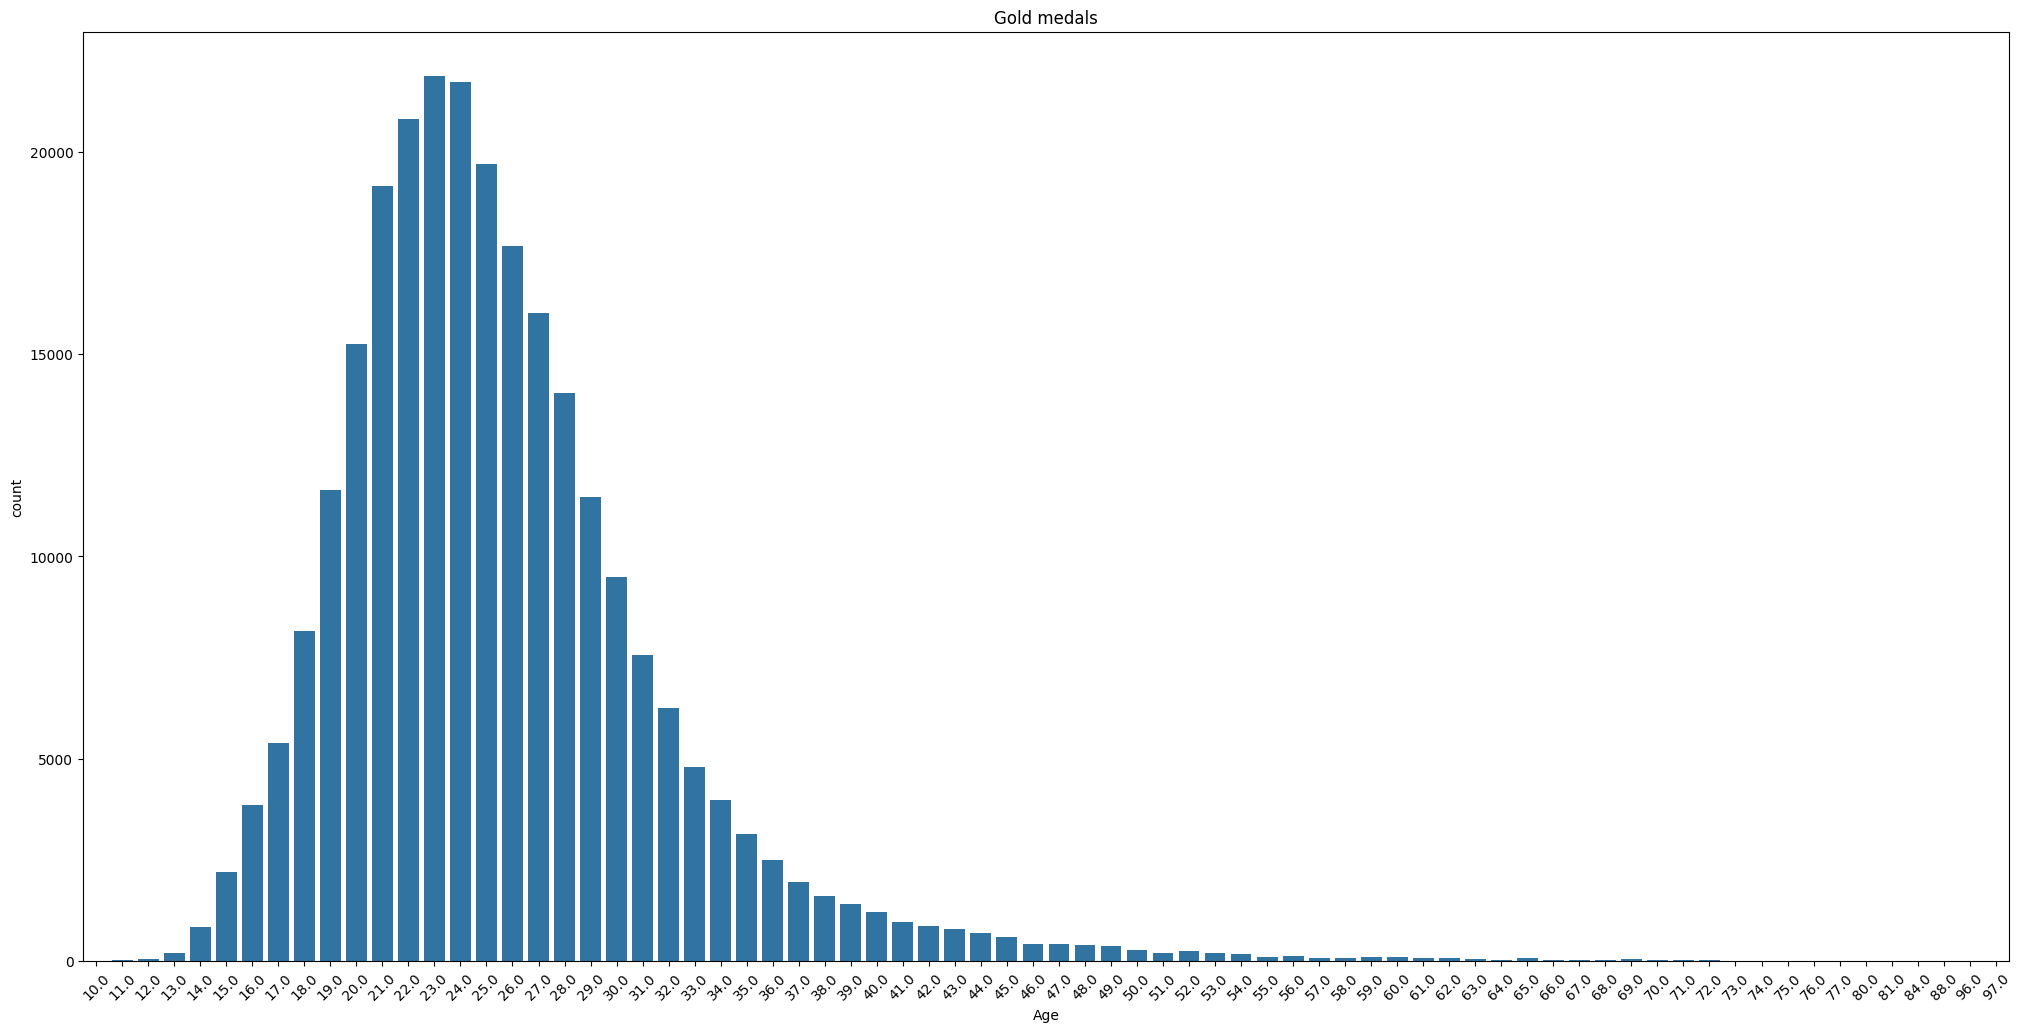

In [77]:
""" Chart på åldern på alla som tagit guld """

""" Röd linje på medelåldern, renskriv koden"""
# age_mean = age1.mean()
# plt.axvline(age_mean, color="r", label="Medel ålder") # Markering på valt värde


gold_medalists = df[df["Medal"] == 'Gold']

plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.countplot(data=gold_medalists,x=df["Age"])
plt.title("Gold medals")

In [ ]:
""" Hur många sporter det är på vintern"""
winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

""" Hur många sporter det är på sommaren """
summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

"""" Chart kopplat till det"""
plt.figure(figsize=(12,6))
plt.title('Sex distribution among the athletes')
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=150, shadow=True)


""" Tyskland """
# Ett card på en OS ikon och Tyska flaggan? 
# Antal medaljer för nationen KLAR
# Antal medaljer för individer KLAR
# Heatmap på alla pallplatser genom tiderna 
# Barplot eller liknande på vintersporter vs sommarsporter. Var har man mest pallplatser/Guld?
# Tabell på städer som os har spelats i genom tiderna i tyskland KLAR
# Graf för varje medalj vs år med pulldow, en graf per medalj. KLAR

""" Världen """
# Hur många grenar i ett stapeldiagram per år som har spelats, kanske något år som det var väldigt många olika grenar
# Hur många os som har utspelats
# Diagram eller tabell på städer som fått ha os
# Baranimation på länders medaljer





NameError: name 'athletes_df' is not defined

In [ ]:
# Filtrering på alla dubletter som förekommer av valda kolumner
temp_df = df.dropna(subset=["Medal"])
temp_df = df.drop_duplicates(subset=["Team","NOC","Games","Year","City","Sport","Event","Medal"])


# Droppar alla nan i medaljkolumnen, listar alla länder
cleaned_df =temp_df.dropna(subset=["Medal"])
temp_df

,ID,SHA Hash Values,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,3a4eef48434c66b3f14ab0221f6762d0ef7c6135ab2790...,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,a6430cc6630934275dc6283f7e97e9625e6587cdddec7a...,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,9c198b205332c2c8e1542e0f9534b9e270780a41d978ec...,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,0a477bb1c5ad39716f9c775e54d18d16aa8b37ada55548...,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,5b7be356aa28178096dc6747f0b8e4e393eaceb5f95310...,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271095,135559,932b55f3ac4c87052a9c0ff29da8e3e73190665d154f02...,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
271096,135559,932b55f3ac4c87052a9c0ff29da8e3e73190665d154f02...,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 5,000 metres",NaN
271097,135559,932b55f3ac4c87052a9c0ff29da8e3e73190665d154f02...,M,29.0,182.0,79.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 10,000 metres",NaN
271098,135559,932b55f3ac4c87052a9c0ff29da8e3e73190665d154f02...,M,33.0,182.0,79.0,Poland,POL,2006 Winter,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 5,000 metres",NaN


In [ ]:
""" Tabell på antal medaljer som tyskland har som nation """

ger_df_team = cleaned_df[cleaned_df["NOC"] == "GER"]

cleaned_df1 = pd.concat([ger_df_team, pd.get_dummies(ger_df_team["Medal"], prefix='Medal')], axis=1)

cleaned_df1

ger_team_medals = cleaned_df1.groupby("NOC").sum()[["Medal_Gold", "Medal_Silver", "Medal_Bronze"]].sort_values("Medal_Gold", ascending=False).reset_index()

ger_team_medals

NameError: name 'cleaned_df' is not defined

In [ ]:
""" Heatmap på alla medaljer Tyskland har gjort i olika idrotter och år """

plt.figure(figsize=(20,20))
new_df = temp_df[temp_df.NOC=="GER"]
final_df = sns.heatmap(new_df.pivot_table(index="Sport", columns="Year", values="Medal", aggfunc="count").fillna(0),annot=True)

plt.title("Tyskland")
# Kan byta land om man vill

plt.show()

In [ ]:
""" Top 10 land med flest medaljer, behöver ej läggas upp på dash """
top10 = temp_df.groupby("Team").count().sort_values("Medal", ascending=False)
top10 = top10.head(10)
top10

In [ ]:
anime_df = temp_df
# Skapar en ny kolumn "Got medal" som tar värde 1 om man fick guld, annars 0
temp_df["Got_medal"] = np.where(temp_df["Medal"].isna(), 0, 1)

# Skapar en ny kolumn "total medal" som är tom med konverterad till int
temp_df["total_medals"] = pd.Series(dtype=int)

# Sorterar tabellen efter år, äldst överst
temp_df.sort_values("Year", ascending=True)

# Kontrollerar vilket land och om dem tog medalj och plussar på en etta i den tomma kolumnen "got medal" +1 --> (total medal) 
temp_df["total_medals"] = temp_df.groupby("Team")["Got_medal"].cumsum()
temp_df

# TODO Kolla om man kan fixa en shysst animated bar plot

# fig = px.scatter(temp_df, x="total_medals", y="Year", size="total_medals", color="Team", size_max=100, log_x=True,
#            animation_frame="Year", animation_group="Team", title="Olympic Medals Thrue Time",
#            range_x=[0, 3000], range_y=[1896, 2016])
# fig.show()

fig = px.bar(temp_df, 
             x="Team", 
             y="total_medals", 
             color="Team", 
             animation_frame="Year",  # Skapa en animation som rör sig genom åren
             range_y=[0, 3000],  # Sätt y-axelns intervall
             title="Total Medals per Team Over Time",
             labels={"total_medals": "Total Medal Count", "Team": "Team"})

# Förbättra layouten
fig.update_layout(
    xaxis={'categoryorder':'total ascending'},  # Sortera baserat på medaljer
    yaxis_title="Total Medal Count",
    xaxis_title="Team",
    showlegend=False)